In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [2]:
#reading the data
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

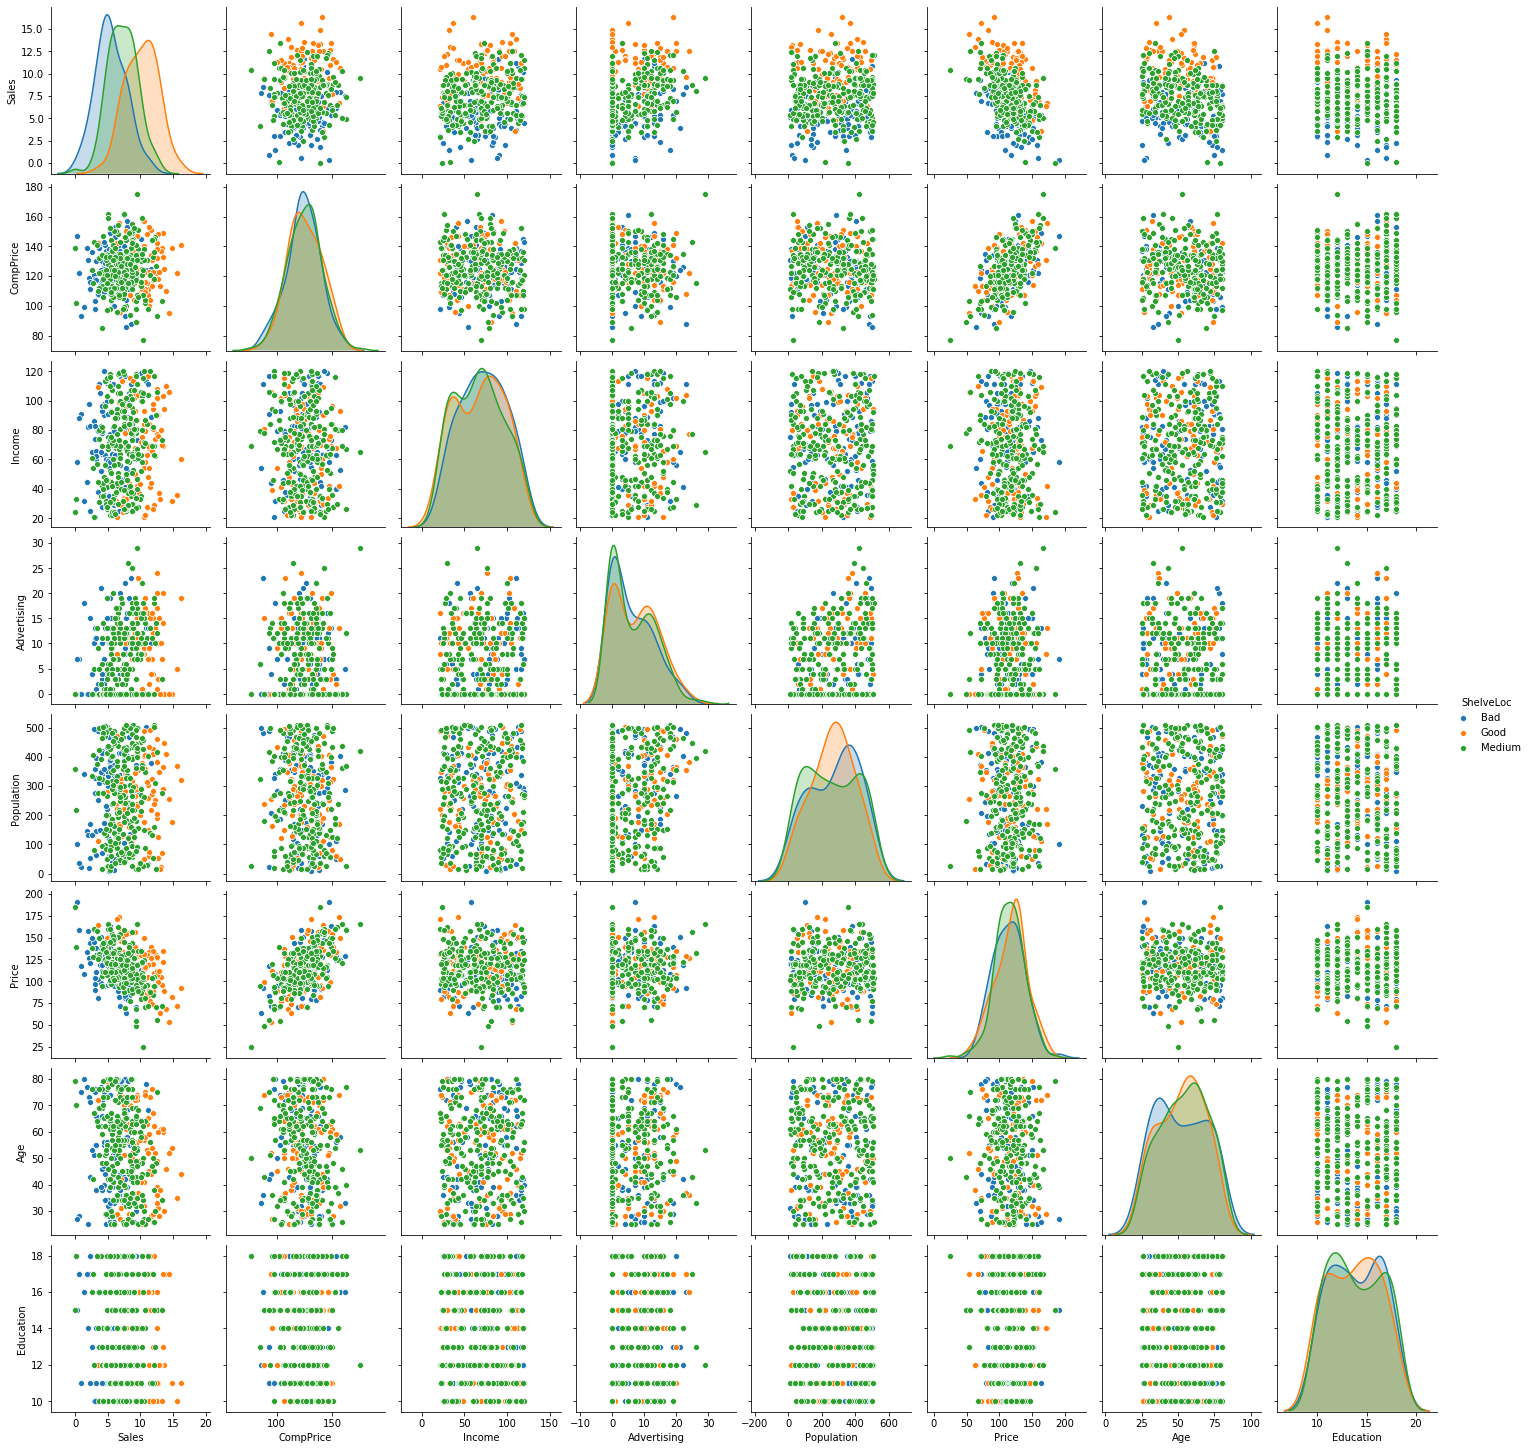

In [6]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'ShelveLoc')

In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


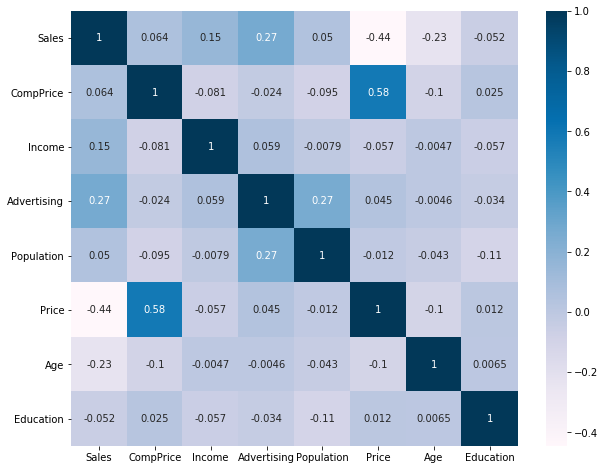

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='PuBu')
plt.show()

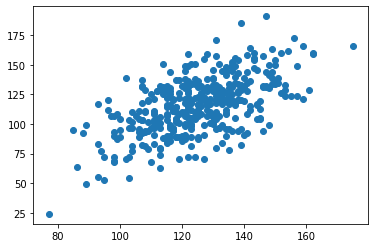

In [9]:
plt.scatter(data=df,x='CompPrice', y='Price')
plt.show()

Sales


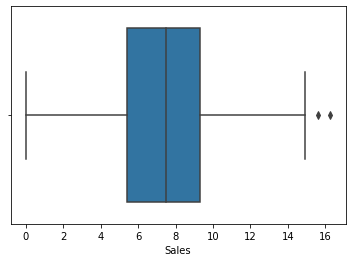

CompPrice


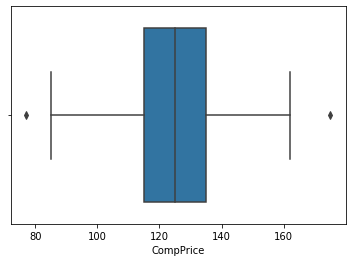

Income


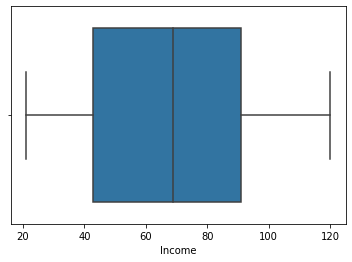

Advertising


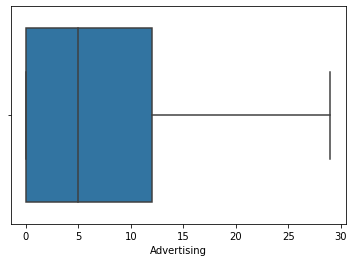

Population


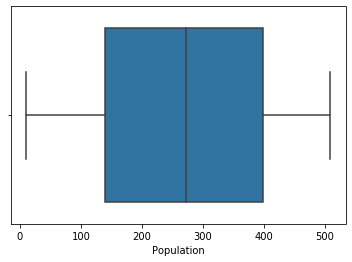

Price


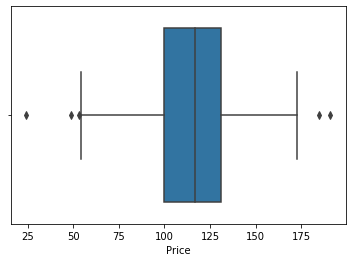

Age


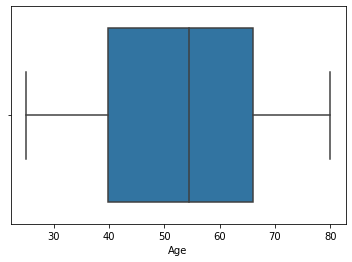

Education


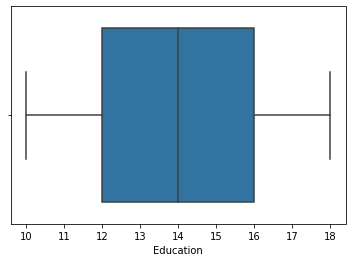

In [10]:
for i in df.iloc[:,:].columns:
    if df[i].dtype != 'object':
        print(i)
        sns.boxplot(df[i])
        plt.show()

In [11]:
## From the above boxplots we can see there are outliers are in Sales, CompPrice and Price columns.

In [12]:
## So let's deal with these particular columns and make them inliers.

In [13]:
def outliers_to_median_values(dframe,column_name):
    
    Q1 = dframe[column_name].quantile(0.25)
    Q3 = dframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dframe[(dframe[column_name] < lower_bound) | (dframe[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = dframe[(dframe[column_name] >= lower_bound) & (dframe[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    dframe.loc[(dframe[column_name] < lower_bound) | (dframe[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=dframe)
    plt.show()

Distribution after outlier removal


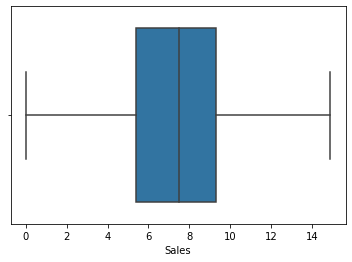

In [14]:
outliers_to_median_values(df,'Sales')

Distribution after outlier removal


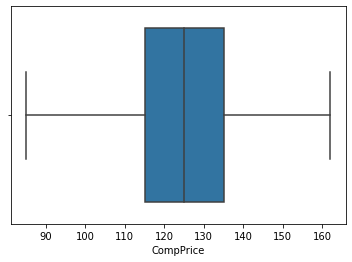

In [15]:
outliers_to_median_values(df,'CompPrice')

Distribution after outlier removal


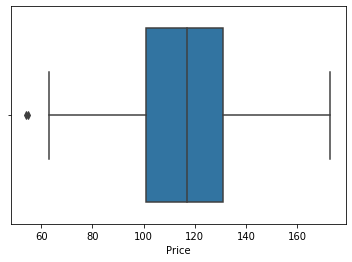

In [16]:
outliers_to_median_values(df,'Price')

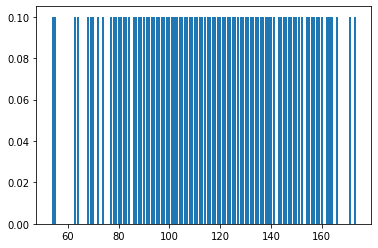

In [17]:
plt.bar(data=df,x=df['Price'], height=0.1,width=0.8, align='center')
plt.show()

Sales


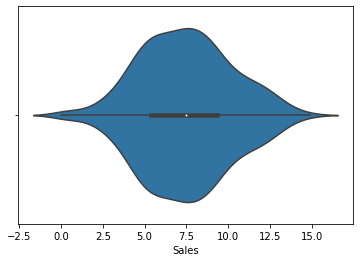

CompPrice


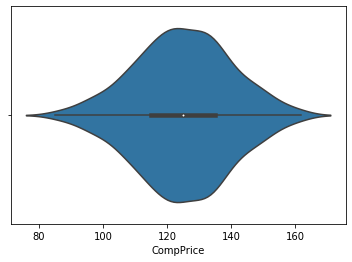

Income


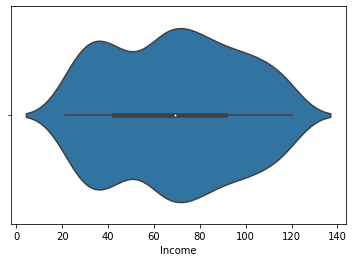

Advertising


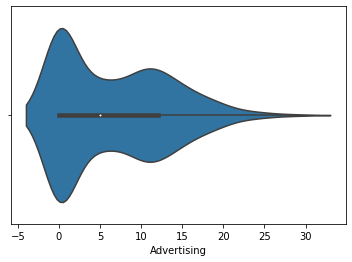

Population


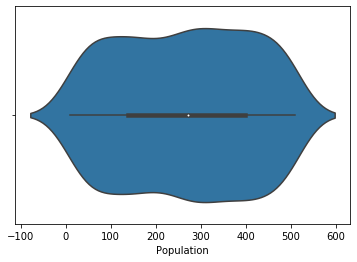

Price


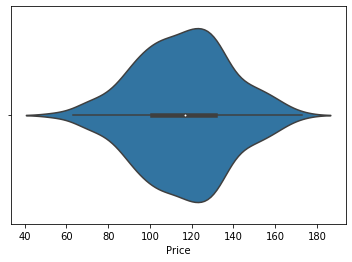

Age


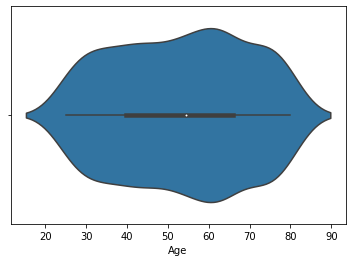

Education


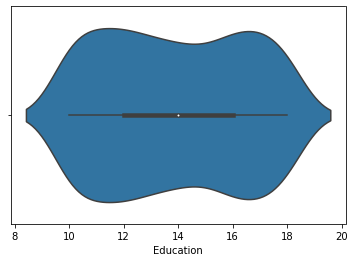

In [18]:
for i in df.iloc[:,:].columns:
    if df[i].dtype != 'object':
        print(i)
        sns.violinplot(df[i], data=df)
        #sns.boxplot(df[i])
        plt.show()

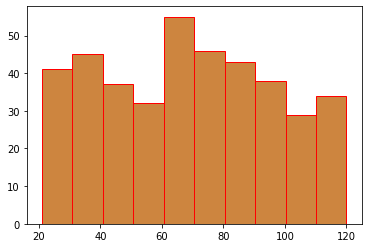

In [19]:
plt.hist(df['Income'],facecolor='peru', edgecolor='red')
plt.show()

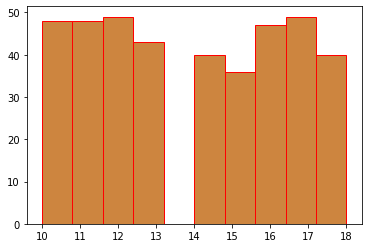

In [20]:
plt.hist(df['Education'],facecolor='peru', edgecolor='red')
plt.show()

In [21]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [22]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138.0,73,11,276,120.0,Bad,42,17,1,1
1,11.22,111.0,48,16,260,83.0,Good,65,10,1,1
2,10.06,113.0,35,10,269,80.0,Medium,59,12,1,1
3,7.40,117.0,100,4,466,97.0,Medium,55,14,1,1
4,4.15,141.0,64,3,340,128.0,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138.0,108,17,203,128.0,Good,33,14,1,1
396,6.14,139.0,23,3,37,120.0,Medium,55,11,0,1
397,7.41,162.0,26,12,368,159.0,Medium,40,18,1,1
398,5.94,100.0,79,7,284,95.0,Bad,50,12,1,1


In [23]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [24]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [25]:
df['ShelveLoc']

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [26]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138.0,73,11,276,120.0,3,42,17,1,1
1,11.22,111.0,48,16,260,83.0,1,65,10,1,1
2,10.06,113.0,35,10,269,80.0,2,59,12,1,1
3,7.40,117.0,100,4,466,97.0,2,55,14,1,1
4,4.15,141.0,64,3,340,128.0,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138.0,108,17,203,128.0,1,33,14,1,1
396,6.14,139.0,23,3,37,120.0,2,55,11,0,1
397,7.41,162.0,26,12,368,159.0,2,40,18,1,1
398,5.94,100.0,79,7,284,95.0,3,50,12,1,1


In [27]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [28]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138.0,73,11,276,120.0
1,11.22,111.0,48,16,260,83.0
2,10.06,113.0,35,10,269,80.0
3,7.40,117.0,100,4,466,97.0
4,4.15,141.0,64,3,340,128.0
...,...,...,...,...,...,...
395,12.57,138.0,108,17,203,128.0
396,6.14,139.0,23,3,37,120.0
397,7.41,162.0,26,12,368,159.0
398,5.94,100.0,79,7,284,95.0


In [29]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [30]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [31]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

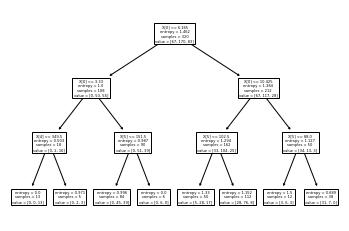

In [33]:
from sklearn import tree

#PLot the decision tree
tree.plot_tree(model);

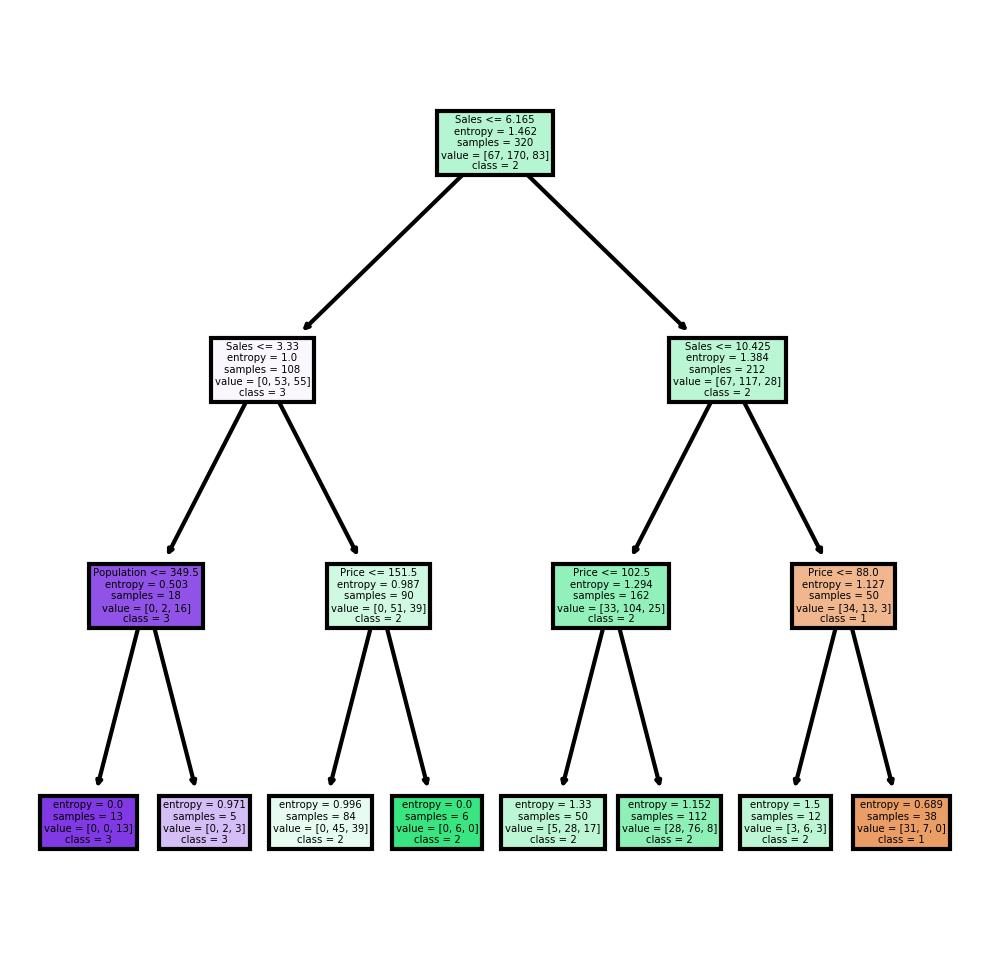

In [34]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    70
1     6
3     4
dtype: int64

In [36]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [37]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,3,15,0
2,3,43,3
3,0,12,1


In [38]:
# Accuracy 
np.mean(preds==y_test)

0.5875

## Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5875